# 서울의 2018년 08월과 2020년 1월 기후 비교분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<font size = 4> ** 1. 서울지점(108)의 기온 비교분석 **

<font size = 3> ** 사용된 자료는 기상자료개방포털에서 다운로드 받았으며,  
    1월의 데이터는 2020년 1월 한달, 8월의 데이터는 2018년 8월 한달,  
    30년 평년값의 데이터는 1981년 ~ 2010년까지의 데이터이다. **

In [2]:
data_01 = pd.read_csv("ta_20200318105009.csv", engine = 'python')
data_08 = pd.read_csv("ta_20200318105047.csv", engine = 'python')

In [3]:
data_01_avg ={"지점" : "서울", "평균기온(°C)" : -2.4, 
               "최저기온(°C)" : -5.9, "최고기온(°C)" : 1.5,
               "강수량(mm)": 20.8, "습도(%)" : 59.8}
data_08_avg = {"지점" : "서울", "평균기온(°C)" : 25.7, 
               "최저기온(°C)" : 22.4, "최고기온(°C)" : 29.6,
               "강수량(mm)": 364.2, "습도(%)" : 75.6}

In [4]:
data_01_avg = pd.DataFrame(data_01_avg, index = [0])
data_08_avg = pd.DataFrame(data_08_avg, index = [0])

In [5]:
data_01_avg

,강수량(mm),습도(%),지점,최고기온(°C),최저기온(°C),평균기온(°C)
0,20.8,59.8,서울,1.5,-5.9,-2.4


In [6]:
data_08_avg

,강수량(mm),습도(%),지점,최고기온(°C),최저기온(°C),평균기온(°C)
0,364.2,75.6,서울,29.6,22.4,25.7


In [7]:
data_01.describe().loc["mean":"std",:]

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
mean,108.0,1.625806,-1.680645,5.900000
std,0.0,2.941311,3.245142,3.041052


In [8]:
data_08.describe().loc["mean":"std",:]

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
mean,108.0,28.761290,25.203226,33.303226
std,0.0,3.130674,2.780705,3.963457


In [9]:
def graph(data, avg_data, title, option):
    plt.figure(figsize = (10,5));
    if option is "min":
        plt.plot(data.iloc[:,2], label = "avg", c = 'lightgray')
        plt.plot(data.iloc[:,3], label = "min", c = 'black')
        plt.plot(data.iloc[:,-1], label = "max", c = 'lightgray')
        plt.plot([avg_data["평균기온(°C)"]] * 31, c = 'lightgray')
        plt.plot([avg_data["최저기온(°C)"]] * 31, c = 'red')
        plt.plot([avg_data["최고기온(°C)"]] * 31, c = 'lightgray')
        plt.legend(loc = 'best')
    if option is "max":
        plt.plot(data.iloc[:,2], label = "avg", c = 'lightgray')
        plt.plot(data.iloc[:,3], label = "min", c = 'lightgray')
        plt.plot(data.iloc[:,-1], label = "max", c = 'black')
        plt.plot([avg_data["평균기온(°C)"]] * 31, c = 'lightgray')
        plt.plot([avg_data["최저기온(°C)"]] * 31, c = 'lightgray')
        plt.plot([avg_data["최고기온(°C)"]] * 31, c = 'red')
        plt.legend(loc = 'best')
    if option is "avg":
        plt.figure(figsize=(10,5))
        plt.plot(data.iloc[:,2], label = "avg", c = 'black')
        plt.plot(data.iloc[:,3], label = "min", c = 'lightgray')
        plt.plot(data.iloc[:,-1], label = "max", c = 'lightgray')
        plt.plot([avg_data["평균기온(°C)"]] * 31, c = 'red')
        plt.plot([avg_data["최저기온(°C)"]] * 31, c = 'lightgray')
        plt.plot([avg_data["최고기온(°C)"]] * 31, c = 'lightgray')
        plt.legend(loc = 'best')

    plt.title(title, fontsize = 15)
    plt.xlabel("Day", fontsize = 15)
    plt.ylabel("(°C)", fontsize = 15);
    return

<Figure size 720x360 with 0 Axes>

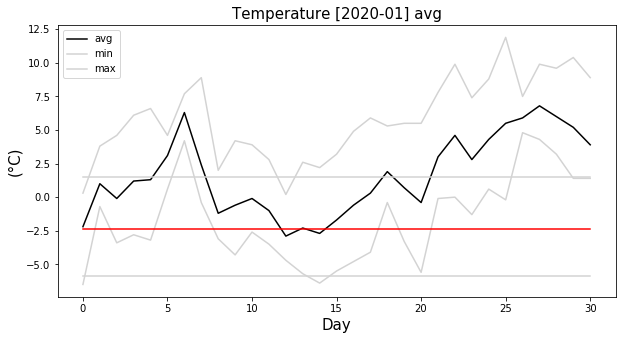

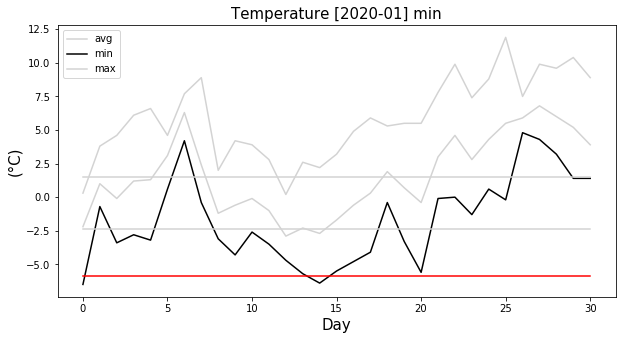

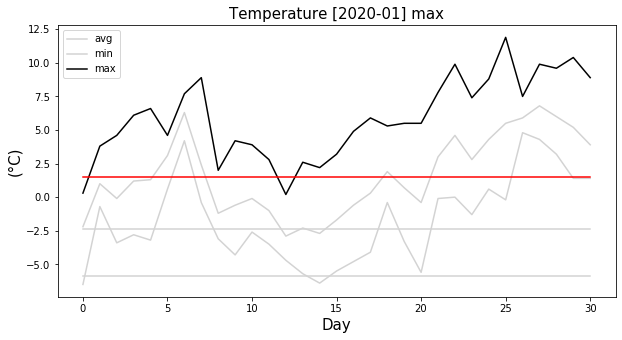

In [10]:
opt = ["avg", "min", "max"]
title = "Temperature [2020-01] "
for i in opt:
    graph(data_01, data_01_avg, title + i, i)
    plt.savefig(title + i)

<font size =3> ** 붉은 실선이 1월에 대한 30년 평년값이고 검은 선은 2020년 1월의 평균기온이다.  
    그래프에서 1월의 평균기온이 30년 평년값보다 작았던 적은 2번이었다.  
    또한 최저기온과 최고기온에서도 30년 평년값보다 크게 나타났다.  
    따라서 2020년 1월의 기온은 30년 평년값에 비해 유난히 온난했다고 볼 수 있다. **

<Figure size 720x360 with 0 Axes>

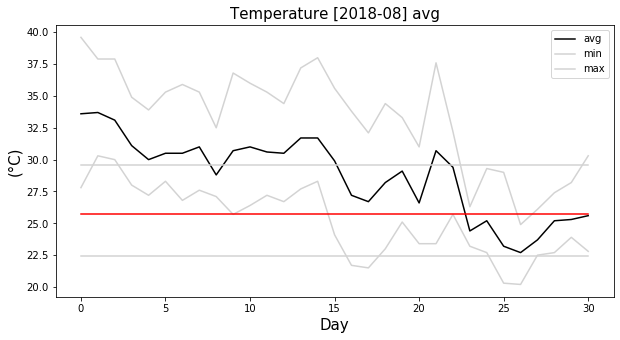

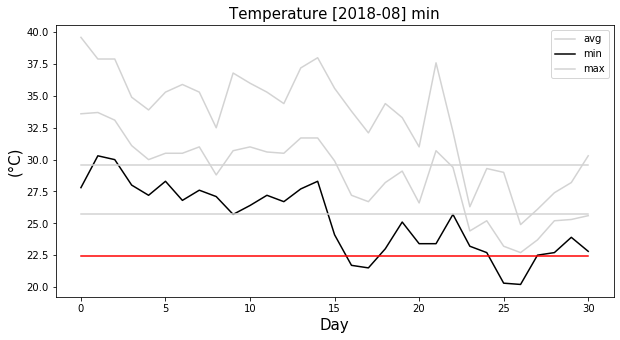

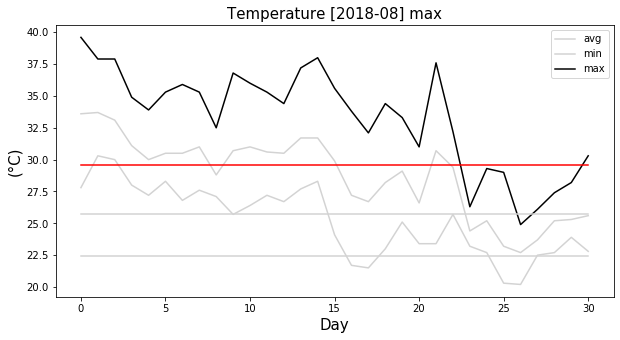

In [20]:
title2 = "Temperature [2018-08] "
for i in opt:
    graph(data_08, data_08_avg, title2 + i, i)
    plt.savefig(title2 + i)

<font size =3> ** 붉은 실선이 8월에 대한 30년 평년값이고 검은 선은 2018년 8월의 평균기온이다.  
    그래프에서 8월의 평균기온은 1일부터 24일 전까지 30년 평년값보다 크게 나타났다.  
    또한 최저기온과 최고기온에서도 비슷한 양상을 보였다.  
    따라서 2018년 8월의 기온은 30년 평년값에 비해 유독 온난했다고 볼 수 있다. **

<font size = 4> ** 2. 서울지점(108)의 강수량 비교분석 **

In [12]:
rain_01 = pd.read_csv("rn_20200322145114.csv", engine = 'python')
rain_08 = pd.read_csv("rn_20200322145036.csv", engine = 'python')

In [13]:
rain_01.describe().loc["mean":"std",:]

,지점,강수량(mm)
mean,108.0,7.562500
std,0.0,16.143724


In [14]:
data_01_avg["강수량(mm)"]

0    20.8
Name: 강수량(mm), dtype: float64

In [15]:
rain_08.describe().loc["mean":"std",:]

,지점,강수량(mm)
mean,108.0,12.662500
std,0.0,24.702007


In [16]:
data_08_avg["강수량(mm)"]

0    364.2
Name: 강수량(mm), dtype: float64

In [17]:
def rain(x, y, avg, title):
    plt.figure(figsize=(10,5))
    plt.bar(x, y, label = 'rainfall', color = 'black')
    plt.plot([avg["강수량(mm)"]] * 31, c = 'red')
    
    plt.title(title, fontsize = 15)
    plt.xlabel("Day", fontsize = 15)
    plt.ylabel("mm", fontsize = 15)

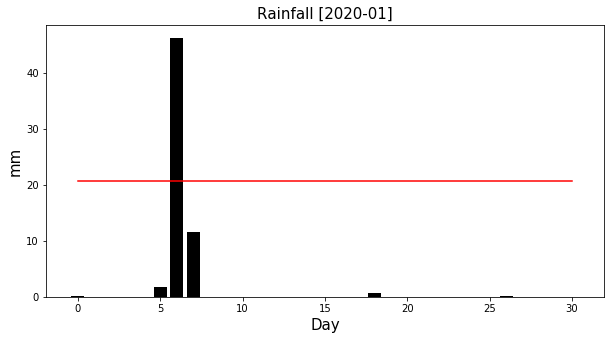

In [18]:
rain(rain_01.index,rain_01.iloc[:,-1],data_01_avg, "Rainfall [2020-01]")
plt.savefig("Rainfall [2020-01]")

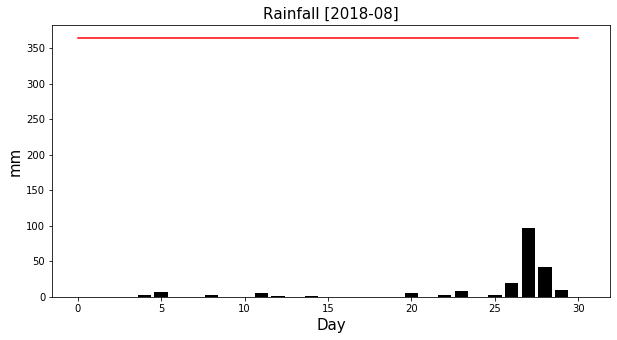

In [19]:
rain(rain_08.index, rain_08.iloc[:,-1], data_08_avg, "Rainfall [2018-08]")
plt.savefig("Rainfall [2018-08]")

<font size =3> ** 각 달의 강수량의 평균과 30년 평년값들을 비교했을 때, 모두 평균보다 현저히 낮은 것을 알 수 있었다.  
    이를 막대그래프로 보았을 때 두 달 모두 특정 날짜와 하루 전, 후로 강수량이 집중되어 있는 것을 알 수 있었다.  
    30년 평년값이 월 별 평년값이므로 값이 1개만 있어 분포를 보는 등의 비교는 할 수 없었다.  **

<font size = 4> ** 3. 서울지점(108)의 상대습도 비교분석 **

In [20]:
print(data_08_avg.iloc[:,-1].values, "65%")

[75.6] 65%


In [21]:
print(data_01_avg.iloc[:,-1].values, "56%")

[59.8] 56%
